<a href="https://colab.research.google.com/github/eliasht/dataKu/blob/main/EliaSihiteSubmissionDicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# nama : Elia Sihite
import tensorflow as tf
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-21 12:33:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.13MB/s    in 4m 38s  

2021-06-21 12:38:29 (1.11 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [49]:
# melakukan split folder
!pip install split-folders
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/hasil_split/", seed=1337, ratio=(.6, .4,))

Copying files: 2188 files [00:00, 4508.99 files/s]


In [50]:
base_dir = '/tmp/rockpaperscissors/hasil_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [12]:
os.listdir(base_dir)

['val', 'train']

In [51]:
# membuat direktori rock, papers dan cissors pada direktori data training
train_rock_dir = os.path.join(base_dir, 'rock')
train_paper_dir = os.path.join(base_dir, 'paper')
train_scissors_dir = os.path.join(base_dir, 'scissors')

# membuat direktori rock, papers dan cissors pada direktori data validation
validation_rock_dir = os.path.join(base_dir, 'rock')
validation_paper_dir = os.path.join(base_dir, 'paper')
validation_scissors_dir = os.path.join(base_dir, 'scissors')

In [52]:
# augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (
                  rescale = 1./255,
                  rotation_range = 20,
                  horizontal_flip = True,
                  shear_range = 0.15,
                  width_shift_range = 0.2, 
                  height_shift_range = 0.2, 
                  zoom_range= 0.15,
                  fill_mode = 'nearest')
test_datagen = ImageDataGenerator (
                  rescale = 1./255,
                  shear_range = 0.15,
                  width_shift_range = 0.2, 
                  height_shift_range = 0.2,
                  zoom_range= 0.15,
                  fill_mode = 'nearest')

In [53]:
# image data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical')

Found 1749 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [55]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [56]:
# melatih latih model
history = model.fit(
            train_generator,
            steps_per_epoch=25, 
            epochs=25, 
            validation_data=validation_generator, 
            validation_steps=5,  
            verbose=2)

Epoch 1/25
25/25 - 35s - loss: 1.1432 - accuracy: 0.3738 - val_loss: 1.0620 - val_accuracy: 0.5000
Epoch 2/25
25/25 - 34s - loss: 0.9475 - accuracy: 0.5775 - val_loss: 0.6992 - val_accuracy: 0.7625
Epoch 3/25
25/25 - 34s - loss: 0.8255 - accuracy: 0.6692 - val_loss: 0.4575 - val_accuracy: 0.8875
Epoch 4/25
25/25 - 33s - loss: 0.6204 - accuracy: 0.7731 - val_loss: 0.6022 - val_accuracy: 0.8062
Epoch 5/25
25/25 - 34s - loss: 0.5506 - accuracy: 0.7900 - val_loss: 0.4295 - val_accuracy: 0.8938
Epoch 6/25
25/25 - 34s - loss: 0.4608 - accuracy: 0.8375 - val_loss: 0.5004 - val_accuracy: 0.7750
Epoch 7/25
25/25 - 34s - loss: 0.4044 - accuracy: 0.8413 - val_loss: 0.4381 - val_accuracy: 0.8375
Epoch 8/25
25/25 - 34s - loss: 0.4248 - accuracy: 0.8365 - val_loss: 0.2890 - val_accuracy: 0.9062
Epoch 9/25
25/25 - 34s - loss: 0.3571 - accuracy: 0.8750 - val_loss: 0.5319 - val_accuracy: 0.7750
Epoch 10/25
25/25 - 33s - loss: 0.3261 - accuracy: 0.8745 - val_loss: 0.2228 - val_accuracy: 0.9438
Epoch 11/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


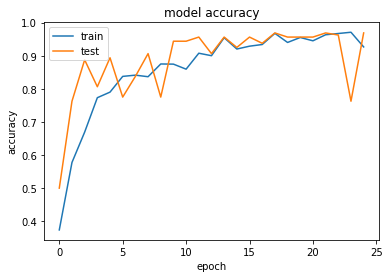

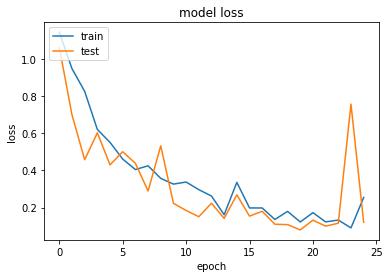

In [57]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 1wk2Hl1Ih9guOwx6.png to 1wk2Hl1Ih9guOwx6 (1).png
1wk2Hl1Ih9guOwx6.png
rock


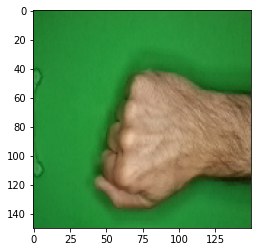

In [62]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(fn)
  if output_class==0:
      print('paper')
  elif output_class==1:
      print('rock')
  else:
      print('scissors')